# üß™ Actividad Evaluada: √Årboles de Decisi√≥n en el Dataset Titanic

üìö **Curso:** Machine Learning

## üìù Instrucciones
- Este notebook debe ser completado individualmente y subido a la plataforma del curso.
- Responde todas las celdas marcadas como c√≥digo y aseg√∫rate de que el notebook se ejecute sin errores.
- Puedes usar material del curso y documentaci√≥n oficial de Python y Scikit-learn.

## üìÑ Descripci√≥n del Dataset
El dataset **Titanic** contiene informaci√≥n sobre los pasajeros del famoso barco Titanic que naufrag√≥ en 1912. El objetivo es predecir si un pasajero sobrevivi√≥ o no (`Survived` = 1 si sobrevivi√≥, 0 si no), a partir de variables como edad, clase, sexo, y punto de embarque.

Este conjunto de datos es ampliamente utilizado en aprendizaje autom√°tico como un primer ejemplo de clasificaci√≥n supervisada.

---

# üåä Actividad Evaluada: √Årboles de Decisi√≥n con el Dataset Titanic

En esta actividad aplicar√°s un modelo de √°rboles de decisi√≥n sobre el dataset Titanic.

### üéØ Objetivos:
- Cargar y explorar el dataset
- Preprocesar las variables categ√≥ricas con One Hot Encoding
- Entrenar un √°rbol de decisi√≥n
- Visualizar el √°rbol
- Evaluar el desempe√±o del modelo

üïê Tiempo estimado: 60 a 90 minutos

In [2]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier #tipo de clasificador
from sklearn.tree import plot_tree #visualizar arbol de decision

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# üì• Cargar el dataset desde la URL de Kaggle (alternativamente cargar localmente)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## üîç 1. Exploraci√≥n inicial del dataset

Antes de comenzar a entrenar modelos de Machine Learning, es fundamental **comprender la estructura y el contenido del conjunto de datos**. En esta secci√≥n, deber√°s realizar una exploraci√≥n b√°sica del dataset Titanic para identificar:

- Las columnas disponibles y sus tipos de datos (`.info()`)
- Las estad√≠sticas descriptivas de las variables num√©ricas (`.describe()`)
- La existencia de valores faltantes (`.isnull().sum()`)

Estas acciones te permitir√°n decidir qu√© pasos de limpieza y preprocesamiento son necesarios. **Recuerda comentar brevemente tus observaciones** al final de esta secci√≥n, por ejemplo: si hay columnas con muchos datos faltantes, si hay outliers o si ciertas variables parecen poco informativas.

In [3]:
# Informaci√≥n general del dataset
df.info()

# Estad√≠sticas descriptivas de las variables num√©ricas
print("\nEstad√≠sticas descriptivas:")
print(df.describe())

# Valores faltantes por columna
print("\nValores faltantes por columna:")
missing_values = df.isnull().sum()
# Comparaci√≥n relativa de los valores faltantes
relative_missing = (missing_values / len(df)) * 100
print(pd.DataFrame({'Valores Faltantes': missing_values, 'Porcentaje (%)': relative_missing}))

# Observaciones:
# - La columna 'Age' tiene 177 valores faltantes, lo que representa aproximadamente el 20% del total.
# - La columna 'Cabin' tiene muchos valores faltantes (687); m√°s del 77% del total.
# - La columna 'Embarked' tiene solo 2 valores faltantes.
# - La variable 'Fare' tiene valores extremos que podr√≠an ser outliers, observable en la diferencia significativa entre valor m√°ximo y Q3.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Estad√≠sticas descriptivas:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std  

## üßπ 2. Preprocesamiento

Antes de entrenar un modelo de Machine Learning, es necesario **preparar adecuadamente los datos**. Este proceso se conoce como *preprocesamiento* y consiste en dejar el conjunto de datos en un formato que los algoritmos puedan utilizar de manera efectiva.

### Pasos a seguir:

1. **Eliminar columnas innecesarias**: Algunas columnas como `PassengerId`, `Name`, `Ticket` o `Cabin` no aportan informaci√≥n √∫til al modelo o contienen datos dif√≠ciles de procesar autom√°ticamente (como texto libre o demasiados valores √∫nicos).

2. **Manejo de valores faltantes**:
   - La columna `Age` tiene valores faltantes que puedes reemplazar por la **mediana**, ya que es menos sensible a valores extremos.
   - La columna `Embarked` tiene pocos valores faltantes, as√≠ que puedes usar la **moda** (valor m√°s frecuente) para completarlos.

3. **Codificaci√≥n de variables categ√≥ricas**:
   - Los algoritmos no pueden trabajar directamente con texto. Por eso, aplicamos **One Hot Encoding** a las variables categ√≥ricas como `Sex` y `Embarked`, transform√°ndolas en columnas binarias (0 y 1).
   - Usar `drop_first=True` evita multicolinealidad y reduce la cantidad de columnas.

> ‚ö†Ô∏è **Importante:** El preprocesamiento tiene un gran impacto en la calidad del modelo. Un paso mal hecho puede afectar seriamente el desempe√±o del algoritmo.

Al finalizar esta etapa, deber√≠as tener un dataset **limpio, sin valores nulos y completamente num√©rico**.

In [4]:
# Eliminar columnas innecesarias para el modelo
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df.head()

# Reemplazar valores faltantes en 'Age' con la mediana
df['Age'].fillna(df['Age'].median(), inplace=True)

# Reemplazar valores faltantes en 'Embarked' con la moda
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Aplicar One Hot Encoding a las variables categ√≥ricas
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df.head()

# Verificar que no hay valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Verificar que todas las columnas son num√©ricas
print("\nTipos de datos por columna:")
print(df.dtypes)


Valores nulos por columna:
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

Tipos de datos por columna:
Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object


C:\Users\leopo\AppData\Local\Temp\ipykernel_53928\1366772892.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\leopo\AppData\Local\Temp\ipykernel_53928\1366772892.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

## üß† 3. Entrenamiento del modelo de √Årbol de Decisi√≥n

En esta etapa, construiremos un modelo predictivo utilizando un **√Årbol de Decisi√≥n**, una t√©cnica de clasificaci√≥n que divide los datos en ramas sucesivas para tomar decisiones basadas en las caracter√≠sticas del conjunto de datos.

### Pasos a seguir:

1. **Separar las variables predictoras (X) y la variable objetivo (y)**.  
   En este caso, `Survived` ser√° nuestra variable objetivo, y el resto de las columnas las usaremos como predictores.

2. **Dividir los datos en conjuntos de entrenamiento y prueba**.  
   Esto se hace para evaluar el modelo con datos que no ha visto antes. Usa `train_test_split` para crear una divisi√≥n, por ejemplo 70% entrenamiento y 30% prueba.

3. **Crear y entrenar el modelo con `DecisionTreeClassifier`**.  
   Puedes usar el par√°metro `max_depth` para limitar la profundidad del √°rbol y evitar sobreajuste.

Cuando termines esta secci√≥n, tu modelo estar√° entrenado y listo para ser evaluado y visualizado.

In [6]:
from sklearn.model_selection import train_test_split

# Seleccionar las caracter√≠sticas (X) y la variable objetivo (y)
X = df.drop(columns=['Survived'])
y = df['Survived']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el clasificador de √°rbol de decisi√≥n
clf = DecisionTreeClassifier(random_state=42)

# Ajustar el modelo al conjunto de entrenamiento
clf.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = clf.predict(X_test)


## üå≥ 4. Visualizaci√≥n del √°rbol

Una de las grandes ventajas de los √°rboles de decisi√≥n es que su estructura se puede visualizar de forma intuitiva, lo que facilita la **interpretaci√≥n del modelo**.

En esta secci√≥n usaremos la funci√≥n `plot_tree()` de `sklearn` para graficar el √°rbol entrenado. En el gr√°fico:

- Cada **nodo interno** representa una condici√≥n de decisi√≥n sobre alguna variable.
- Cada **rama** muestra el resultado de esa decisi√≥n (verdadero o falso).
- Cada **nodo terminal** (o hoja) muestra la clase predicha y cu√°ntas muestras llegaron a ese punto.

### Sugerencia:
Puedes ajustar los par√°metros de `plot_tree()` como `feature_names`, `class_names` y `filled=True` para mejorar la legibilidad del √°rbol. Aseg√∫rate de usar `plt.figure(figsize=(ancho, alto))` para que la visualizaci√≥n no se corte.

**Objetivo:** Entender c√≥mo el modelo est√° tomando decisiones, qu√© variables usa y con qu√© prioridad.

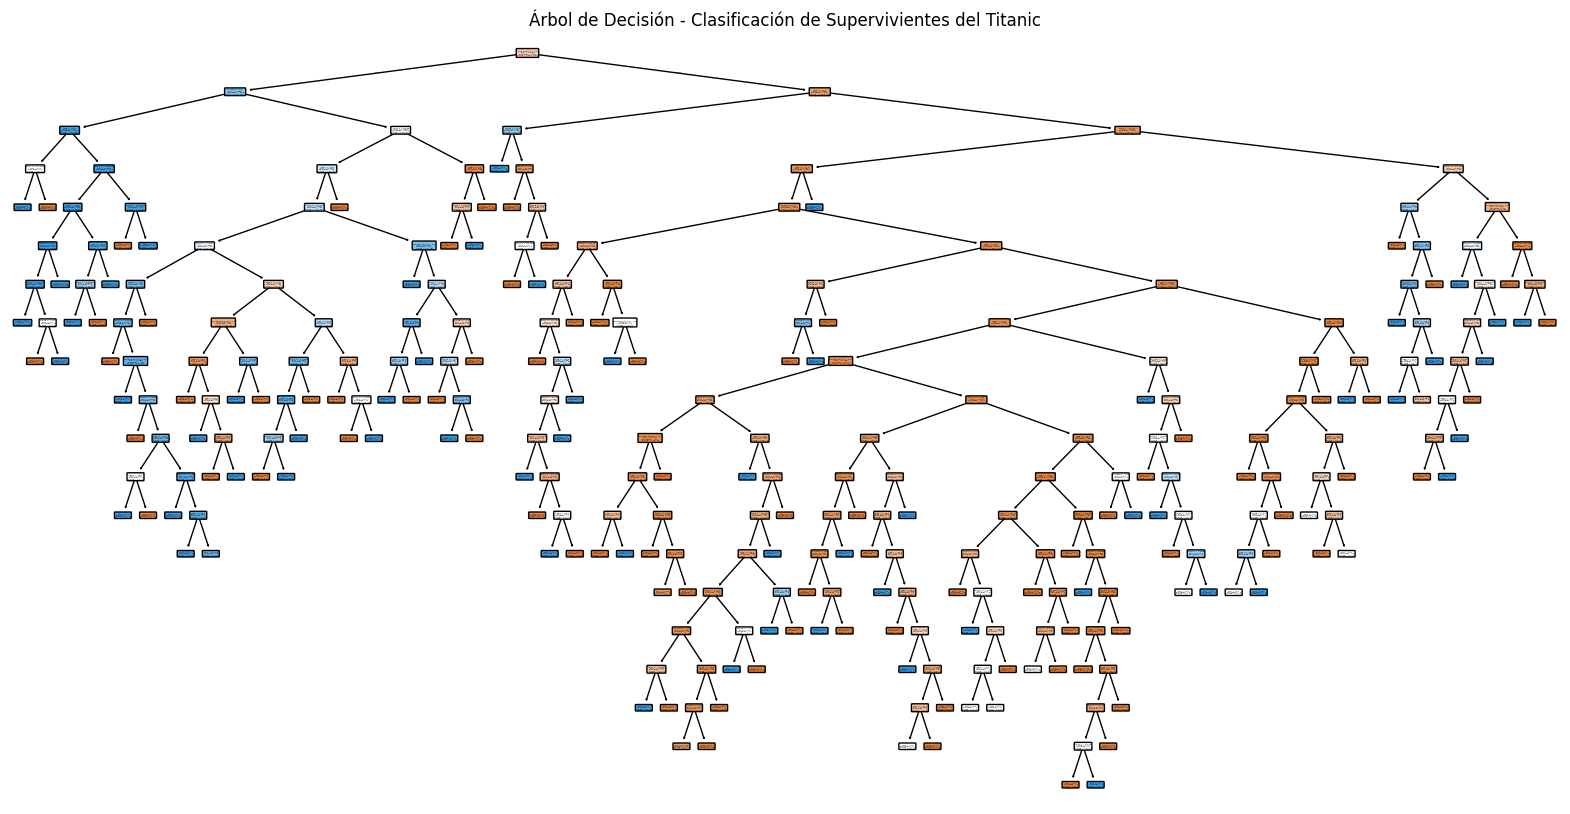

In [ ]:
# plt.figure para ajustar el tama√±o de la figura
plt.figure(figsize=(20, 10))

# Uso de plot_tree de sklearn para visualizar el √°rbol de decisi√≥n
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("√Årbol de Decisi√≥n - Clasificaci√≥n de Supervivientes del Titanic")
plt.show()


## üìà 5. Evaluaci√≥n del modelo

Una vez entrenado el modelo, es fundamental **evaluar su desempe√±o** para entender qu√© tan bien est√° funcionando. En esta secci√≥n usaremos datos de prueba (no vistos por el modelo durante el entrenamiento) para calcular m√©tricas que nos ayuden a juzgar la calidad de las predicciones.

### M√©tricas que utilizaremos:

- **Matriz de confusi√≥n (`confusion_matrix`)**: muestra la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. Es √∫til para entender errores espec√≠ficos del modelo.
- **Reporte de clasificaci√≥n (`classification_report`)**: incluye precisi√≥n (*precision*), exhaustividad (*recall*), y la m√©trica F1 para cada clase.
- **Exactitud (`accuracy_score`)**: indica qu√© porcentaje total de predicciones fue correcto.

Estas m√©tricas te permitir√°n **identificar si el modelo est√° desbalanceado**, si tiende a predecir m√°s una clase que otra, y si necesita ajustes en par√°metros o preprocesamiento.

> üí° Recuerda: un modelo con buena precisi√≥n pero bajo *recall* puede ser problem√°tico si nos interesa no dejar pasar casos positivos (como sobrevivientes).

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\nMatriz de confusi√≥n:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nExactitud del modelo: {accuracy:.2f}")



Matriz de confusi√≥n:
[[124  33]
 [ 35  76]]

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       157
           1       0.70      0.68      0.69       111

    accuracy                           0.75       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268


Exactitud del modelo: 0.75


---
## ü§î Preguntas de Reflexi√≥n

Responde brevemente las siguientes preguntas al final de tu actividad. Puedes escribir tus respuestas directamente bajo cada pregunta:

1. ¬øQu√© variables crees que fueron m√°s importantes para predecir la supervivencia? ¬øPor qu√©?

2. ¬øQu√© limitaciones puede tener un √°rbol de decisi√≥n si no se controla su profundidad?

3. ¬øQu√© diferencias habr√≠a si us√°ramos codificaci√≥n ordinal en lugar de One Hot Encoding?

4. ¬øQu√© cambiar√≠as en el preprocesamiento o configuraci√≥n del modelo para mejorar los resultados?

5. ¬øCrees que este modelo se puede usar directamente en un entorno real? ¬øQu√© consideraciones √©ticas o t√©cnicas deber√≠as tener?


**1. ¬øQu√© variables crees que fueron m√°s importantes para predecir la supervivencia? ¬øPor qu√©?**

In [ ]:
# 'Pclass' y 'Sex', porque se sabe que en el Titanic, a los pasajeros de primera clase y a las mujeres se les daba preferencia en los botes salvavidas.
# En este caso, 'Sex' puede entregar informaci√≥n a la predicci√≥n gracias al One Hot Encoding.


**2. ¬øQu√© limitaciones puede tener un √°rbol de decisi√≥n si no se controla su profundidad?**

In [ ]:
# Puede sobreajustar (overfitting) los datos de entrenamiento, lo que lleva a un rendimiento deficiente en datos no vistos.
# Puede ser ineficiente en t√©rminos de tiempo de entrenamiento y predicci√≥n si el √°rbol es muy grande.


**3. ¬øQu√© diferencias habr√≠a si us√°ramos codificaci√≥n ordinal en lugar de One Hot Encoding?**

In [ ]:
# El modelo podr√≠a interpretar patrones de progresi√≥n en los valores codificados, cuando en realidad no hay una relaci√≥n directa entre ellos.
# Servir√≠a si se quisiera dar alg√∫n tipo de peso al valor de las variables categ√≥ricas, pero no es necesario en este caso.


**4. ¬øQu√© cambiar√≠as en el preprocesamiento o configuraci√≥n del modelo para mejorar los resultados?**

In [ ]:
# Evaluar la importancia de las caracter√≠sticas y eliminar las menos relevantes.
# Ajustar los par√°metros del √°rbol de decisi√≥n, como la profundidad m√°xima o el n√∫mero m√≠nimo de muestras por hoja.


**5. ¬øCrees que este modelo se puede usar directamente en un entorno real? ¬øQu√© consideraciones √©ticas o t√©cnicas deber√≠as tener?**

In [ ]:
# No creo que este modelo se pueda usar directamente en un entorno real, porque lleg√≥ a una exactitud de 0.75, lo que indica que probablemente su precisi√≥n no sea aceptable en un entorno de seguridad. Adem√°s, el modelo est√° basado en un caso muy antiguo y los protocolos de seguridad en barcos han cambiado mucho desde la √©poca del Titanic.
# Consideraciones √©ticas incluyen sesgos en los datos, privacidad de los pasajeros y la posibilidad de discriminar injustamente en base a clases socioecon√≥micas. Yo esperar√≠a que en nuestro tiempo la clase social no sea un factor determinante para la supervivencia de una persona en un accidente mar√≠timo.
# Dentro de consideraciones t√©cnicas, el modelo debe ser validado y ajustado para evitar sobreajuste y mejorar su generalizaci√≥n a nuevos datos.

